this jupyer notebook uses Python 3.10 as its kernel !

# SVM

| Data | Xi1 | Xi2 | Yi  | αi    |
| ---- | --- | --- | --- | ----- |
| X1   | 4   | 2.9 | 1   | 0.414 |
| X2   | 4   | 4   | 1   | 0     |
| X3   | 1   | 2.5 | -1  | 0     |
| X4   | 2.5 | 1   | -1  | 0.018 |
| X5   | 4.9 | 4.5 | 1   | 0     |
| X6   | 1.9 | 1.9 | -1  | 0     |
| X7   | 3.5 | 4   | 1   | 0.018 |
| X8   | 0.5 | 1.5 | -1  | 0     |
| X9   | 2   | 2.1 | -1  | 0.414 |
| X10  | 4.5 | 2.5 | 1   | 0     |


[25 pts] Support Vector Machines: Given 10 points in Table 1, along with their classes and their Lagrangian multipliers (αi), answer the following questions. The solution is already provided in the lecture slide.

[10 pts] Using NumPy, implement a simple SVM that returns the coefficients of the hyperplane. The simple SVM does not require an SDG approach. The simple SVM has three arguments, X, Y, and α, as simple_SVM(X,Y,alpha). What is the equation of h(x)? Draw the hyperplane with the 10 points.

[10 pts] Write a method that calculates the distance of each point from the hyperplane and returns a binary result if a point is within the margin. If a point is in the margin, the binary result is 1 and 0 otherwise. What is the maximized margin? Return the result in the table format as shown.

| Data | Distance | In Margin? |
| ---- | -------- | ---------- |
| x*1  | D*1      | {0,1}      |
| ⋮    | ⋮        | ⋮          |
| x*10 | D_10     | {0,1}      |

[5 pts] Classify the point z = (3, 3)T using h(x) from above.


We are given a set of 10 points along with their classes and Lagrangian multipliers.
We can solve for the coefficients of the hyperplane using the following algorithm for SVM:
For calculating the weight vector, we have:

w = Σ(αi * yi * xi)

And for calculating the bias, we have:

b = yi - w^T xi

Once we have calculated the weight vector and bias, we can use them to classify new data points using the hyperplane function:

h(x) = w^T x + b

where x is the new data point.

To calculate the distance of each point from the hyperplane, we use the formula:

distance = |h(x)| / ||w||

where ||w|| is the norm of the weight vector.

Finally, to calculate the margin, we need to find the distance between the hyperplane and the closest data point from either class. This can be done by iterating over all the data points and finding the minimum distance for each class.

In [398]:
# imports for SVM
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [399]:
# i have used around to around the decimal calculations to 2 decimal places
class SVM:
    def __init__(self):
        self.X = None
        self.y = None
        self.alpha = None
        self.b = None
        self.w = None
        self.precision = 3
        self.marginError = 10**(-self.precision)

    def fit(self, X, y, alpha):
        self.X = X
        self.y = y
        self.alpha = alpha
        # calculate weights
        self.w = np.sum(alpha * y * X.T, axis=1)
        # get support vectors
        self.idx = alpha > 0.0
        self.supportVectors = X[self.idx]
        self.b = np.around(np.mean(y[self.idx] - np.dot(X[self.idx], self.w)),self.precision)
        # Compute the maximum margin
        self.margin = np.around(1 / np.linalg.norm(self.w),self.precision)

    def predict(self, X):
        # Compute the SVM output for input data
        distances = np.around(
           (np.dot(X, self.w) + self.b) / np.linalg.norm(self.w),self.precision
        )
        return np.where(
            distances <= self.margin,
            np.sign(np.dot(X, self.w) + self.b),
            -1 * np.sign(np.dot(X, self.w) + self.b),
        )

    def margin_table(self):
        self.distances = np.around(
            self.y*(np.dot(self.X, self.w) + self.b) / np.linalg.norm(self.w), self.precision
        )
        in_margin = np.array(np.abs(self.distances) <= np.abs(self.margin)+self.marginError ).astype(int)
        table = pd.DataFrame(
            {
                "Data": ["X" + str(i) for i in range(1, len(self.X) + 1)],
                "X1": [i[0] for i in self.X],
                "X2": [i[1] for i in self.X],
                "Y": [i for i in self.y],
                "Distance": self.distances,
                "In Margin?": in_margin,
            }
        )
        return table

In [400]:
# initialise data
X = np.array([4, 2.9, 4, 4, 1, 2.5, 2.5, 1, 4.9, 4.5, 1.9, 1.9, 3.5, 4, 0.5, 1.5, 2, 2.1,4.5, 2.5]).astype(np.float64).reshape(10, 2)
print("X: \n", X)

y = np.array([1, 1, -1, -1, 1, -1, 1, -1, -1, 1]).astype(np.float64)
print("y: \n", y)

alpha = np.array([0.414, 0, 0, 0.018, 0, 0, 0.018, 0, 0.414, 0]).astype(np.float64)
print("alphaLagrange: \n", alpha)



X: 
 [[4.  2.9]
 [4.  4. ]
 [1.  2.5]
 [2.5 1. ]
 [4.9 4.5]
 [1.9 1.9]
 [3.5 4. ]
 [0.5 1.5]
 [2.  2.1]
 [4.5 2.5]]
y: 
 [ 1.  1. -1. -1.  1. -1.  1. -1. -1.  1.]
alphaLagrange: 
 [0.414 0.    0.    0.018 0.    0.    0.018 0.    0.414 0.   ]


In [401]:
# Run simple SVM
simple_SVM = SVM()
simple_SVM.fit(X, y, alpha)

# Print the coefficients of the hyperplane
print("Coefficients of the hyperplane:")
print("w =", simple_SVM.w)
print("b =", simple_SVM.b)
print("max margin =",simple_SVM.margin)
print(f'\n eqautionf of hyperplane can be given as \n h(x) = {simple_SVM.w}.T * x + {simple_SVM.b}')

print(f'\n support vectors : \n {simple_SVM.supportVectors}' )
margin_table = simple_SVM.margin_table()
print(f'\n margin Table : \n {margin_table}')
test = np.array([3,3])
result = simple_SVM.predict(test)
print(f'\n \n {test} belongs to class {result}')


Coefficients of the hyperplane:
w = [0.846  0.3852]
b = -3.501
max margin = 1.076

 eqautionf of hyperplane can be given as 
 h(x) = [0.846  0.3852].T * x + -3.501

 support vectors : 
 [[4.  2.9]
 [2.5 1. ]
 [3.5 4. ]
 [2.  2.1]]

 margin Table : 
   Data   X1   X2    Y  Distance  In Margin?
0   X1  4.0  2.9  1.0     1.076           1
1   X2  4.0  4.0  1.0     1.532           0
2   X3  1.0  2.5 -1.0     1.820           0
3   X4  2.5  1.0 -1.0     1.077           1
4   X5  4.9  4.5  1.0     2.558           0
5   X6  1.9  1.9 -1.0     1.250           0
6   X7  3.5  4.0  1.0     1.077           1
7   X8  0.5  1.5 -1.0     2.690           0
8   X9  2.0  2.1 -1.0     1.076           1
9  X10  4.5  2.5  1.0     1.365           0

 
 [3 3] belongs to class 1.0


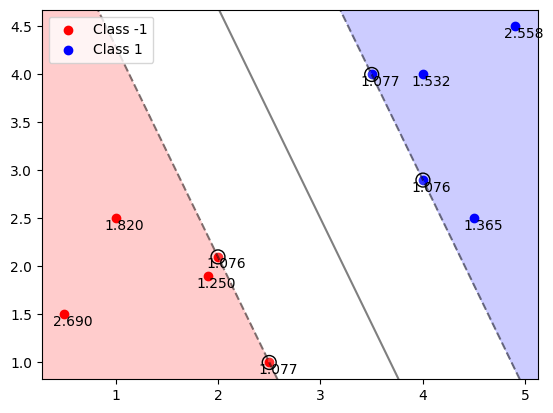

In [402]:
# Plot the data points
fig, ax = plt.subplots()
# X = np.append(X,[test],axis=0)
# y = np.append(y,[result],axis=0)
scatter1 = ax.scatter(np.array(X)[y == -1, 0], np.array(X)[y == -1, 1], c='r', label='Class -1')
scatter2 = ax.scatter(np.array(X)[y == 1, 0], np.array(X)[y == 1, 1], c='b', label='Class 1')

# Plot the hyperplane and margins
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1])
yy = np.linspace(ylim[0], ylim[1])
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = (np.dot(xy, simple_SVM.w) + simple_SVM.b).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.contourf(XX, YY, Z, levels=[-np.inf, -1, 0, 1, np.inf], alpha=0.2,colors=['red', 'white','white', 'blue'])
ax.scatter(simple_SVM.supportVectors[:, 0], simple_SVM.supportVectors[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
for i in range(len(simple_SVM.distances)):
    # if y[i] == 1:
    #     direction = -1
    # else:
    #     direction = 1
    # normal_vector = simple_SVM.w / np.linalg.norm(simple_SVM.w)
    # p0 = X[i]
    # p1 = p0 + direction * simple_SVM.distances[i] * normal_vector
    # ax.plot([p0[0], p1[0]], [p0[1], p1[1]], '--k')
    ax.annotate("{:.3f}".format(simple_SVM.distances[i]), (X[i][0], X[i][1]), textcoords="offset points", xytext=(-8,-8))
plt.legend(handles=[scatter1, scatter2])
plt.show()


As we can see from the graph and output before we have all the Support vectors to be within or on the margin

the new point to which was classified using the SVM [3,3] was classified correctly as class 1

# Neural Network

In [403]:
# my jupyter notebook uses python 3.10 and wasnt able to use cPickle so had to use pickle instead to load the dataset 
# import cPickle, gzip, numpy
# # Load the dataset
# f = gzip.open('mnist.pkl.gz', 'rb')
# train_set, valid_set, test_set = cPickle.load(f)
# f.close()


In [404]:
#imports for the cells below 
import gzip
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [405]:


train_set, valid_set, test_set = None , None, None 
with gzip.open('./mnist-1.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set  = pickle.load(f, encoding='latin1')

In [406]:
# Check that the datasets are loaded correctly
print("Train set:", train_set)
print("Valid set:", valid_set)
print("Test set:", test_set)

# Access the train_set variable
X_train, y_train = train_set
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_valid, y_valid = valid_set
print("X_valid shape:", X_valid.shape)
print("y_valid shape:", y_valid.shape)

X_test, y_test = test_set
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Train set: (array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([5, 0, 4, ..., 8, 4, 8], dtype=int64))
Valid set: (array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([3, 8, 6, ..., 5, 6, 8], dtype=int64))
Test set: (array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([7, 2, 1, ..., 4, 5, 6], dtype=int64))
X_train shape: (50000, 784)
y_train shape: (50000,)
X_valid

In [ ]:
import pandas as pd
df = pd(train_set)
print(train_set)

In [407]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)


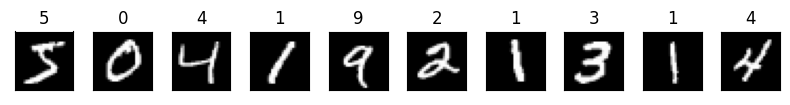

In [408]:
# just wanted to see what the data looks like as an image 
sample_size = 10
images = X_train[:sample_size]
labels = y_train[:sample_size]

# Reshape the images from 1D to 2D arrays
images = images.reshape((-1, 28, 28))

# Plot the images as subplots in a 5x5 grid
fig, axes = plt.subplots(nrows=1, ncols=sample_size, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    # Plot image
    ax.imshow(images[i], cmap='gray')
    # Set title to the corresponding label
    ax.set_title(str(labels[i]))
    # Remove ticks and labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

# Show the plot
plt.tight_layout()
plt.show()

In [409]:
from sklearn.neural_network import MLPClassifier
# train the model 
model = MLPClassifier(solver='sgd',alpha=1E-4,activation='logistic')
model.fit(X_train,y_train)


c:\Users\sanje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', solver='sgd')

In [410]:
#evaluate the model on Test Data without hyperparam tuning
from sklearn.metrics import accuracy_score
model_pred = model.predict(X_test)
accuracy_score = accuracy_score(y_test,model_pred)
print(accuracy_score)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, model_pred))

0.932
[[ 962    0    3    1    0    3    8    1    2    0]
 [   0 1109    2    2    0    1    4    2   15    0]
 [  11    6  944   11   12    1   12   10   22    3]
 [   3    1   18  936    0   18    2   13   13    6]
 [   1    3    4    0  922    0   10    2    4   36]
 [   8    3    5   38    6  784   16    5   20    7]
 [  10    3    4    0   11   11  914    1    4    0]
 [   3    8   26    6    6    0    0  952    2   25]
 [   6    8    5   20    8   18   11   10  884    4]
 [  11    7    1   12   35    6    1   17    6  913]]


In [411]:
# lets use GriDSearchCV to tune hyper params 
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV()

TypeError: GridSearchCV.__init__() missing 2 required positional arguments: 'estimator' and 'param_grid'